<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Escreva seu nome aqui.*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [2]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 17.2MB/s]


In [3]:
# Importação das bibliotecas
import pandas as pd

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

In [91]:
corr_df = df.filter(['Taxa de Rejeição (%)', 'Taxa de Conversão (%)', 'Sessões', 'Visitantes Únicos', 'Tempo Médio de Sessão (minutos)', 'Eventos'])
corr_df.corr()

,Taxa de Rejeição (%),Taxa de Conversão (%),Sessões,Visitantes Únicos,Tempo Médio de Sessão (minutos),Eventos
Taxa de Rejeição (%),1.000000,-0.974824,-0.968901,-0.960974,-0.982036,0.116950
Taxa de Conversão (%),-0.974824,1.000000,0.983243,0.984202,0.976846,-0.129913
Sessões,-0.968901,0.983243,1.000000,0.965535,0.968905,-0.145092
Visitantes Únicos,-0.960974,0.984202,0.965535,1.000000,0.960822,-0.118113
Tempo Médio de Sessão (minutos),-0.982036,0.976846,0.968905,0.960822,1.000000,-0.081397
Eventos,0.116950,-0.129913,-0.145092,-0.118113,-0.081397,1.000000


In [7]:
print(df.shape)

(60, 10)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Data                             60 non-null     object 
 1   Visitantes Únicos                60 non-null     float64
 2   Sessões                          60 non-null     float64
 3   Taxa de Rejeição (%)             60 non-null     float64
 4   Páginas por Sessão               60 non-null     float64
 5   Principais Origens do Tráfego    60 non-null     object 
 6   Dispositivos                     60 non-null     object 
 7   Eventos                          60 non-null     int64  
 8   Taxa de Conversão (%)            60 non-null     float64
 9   Tempo Médio de Sessão (minutos)  60 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.8+ KB
None


In [6]:
print(df.columns)

Index(['Data', 'Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)',
       'Páginas por Sessão', 'Principais Origens do Tráfego', 'Dispositivos',
       'Eventos', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)'],
      dtype='object')


In [9]:
df.describe()

,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,301.133333,449.450000,34.230939,4.007533,5.300000,4.499632,10.045957
std,120.896295,182.619121,10.164913,1.156751,2.109703,1.486718,3.413248
min,90.000000,126.000000,20.177732,1.834201,1.000000,1.952083,4.680899
25%,196.500000,298.750000,24.860077,3.078881,3.750000,3.329572,6.915095
50%,319.500000,456.000000,34.381987,4.027289,5.000000,4.530517,10.039833
75%,401.250000,616.000000,43.013749,4.890745,6.250000,5.748005,13.282681
max,517.000000,769.000000,50.496714,5.996747,10.000000,7.075193,16.360085


In [11]:
df.isnull().sum()

Data                               0
Visitantes Únicos                  0
Sessões                            0
Taxa de Rejeição (%)               0
Páginas por Sessão                 0
Principais Origens do Tráfego      0
Dispositivos                       0
Eventos                            0
Taxa de Conversão (%)              0
Tempo Médio de Sessão (minutos)    0
dtype: int64

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 60 artists>

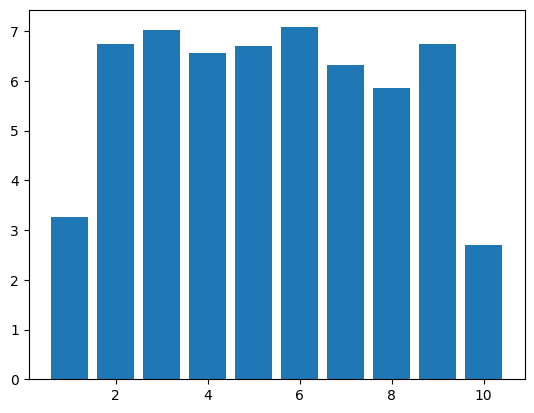

In [24]:
plt.bar(df['Eventos'],df['Taxa de Conversão (%)'])

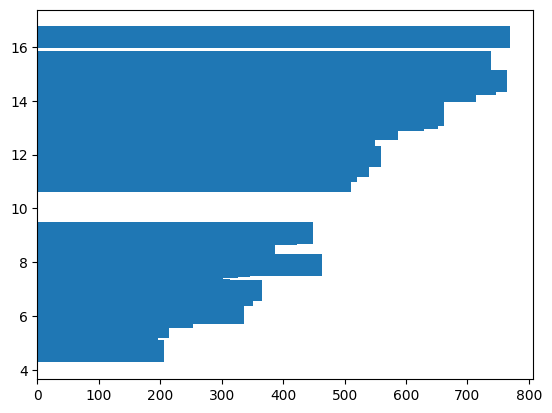

In [28]:
plt.barh(df['Tempo Médio de Sessão (minutos)'], df['Sessões'])
plt.show()

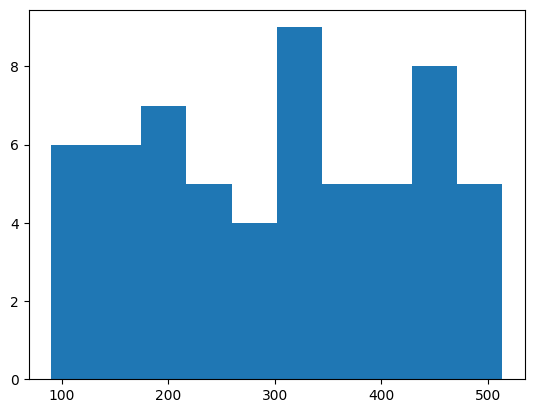

In [36]:
import numpy as np

x = np.random.normal(df['Visitantes Únicos'], df['Eventos'])

plt.hist(x)
plt.show()

(array([4., 1., 5., 2., 2., 5., 2., 3., 2., 4., 4., 2., 5., 2., 2., 3., 3.,
        3., 4., 2.]),
 array([1.95208258, 2.20823811, 2.46439365, 2.72054919, 2.97670472,
        3.23286026, 3.48901579, 3.74517133, 4.00132687, 4.2574824 ,
        4.51363794, 4.76979348, 5.02594901, 5.28210455, 5.53826009,
        5.79441562, 6.05057116, 6.30672669, 6.56288223, 6.81903777,
        7.0751933 ]),
 <BarContainer object of 20 artists>)

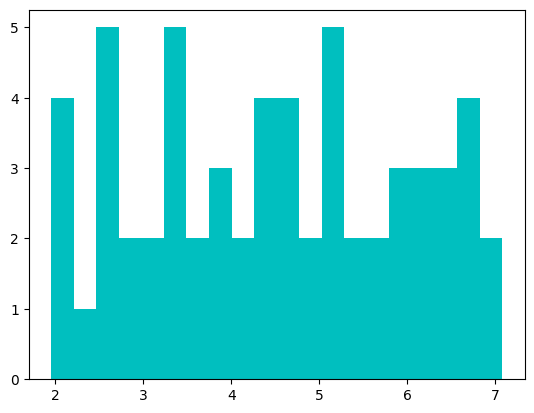

In [49]:
plt.hist(df['Taxa de Conversão (%)'], bins=20, color='c')

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

Pegando os parâmetros estatísticos para usar na simualação

In [40]:
media = df['Taxa de Conversão (%)'].mean()
print(f"Média da Taxa de Conversão: {media}")
desvio_padrao = df['Taxa de Conversão (%)'].std()
print(f"Desvio padrão da Taxa de Conversão (%): {desvio_padrao}")

Média da Taxa de Conversão: 4.499631657295852
Desvio padrão da Taxa de Conversão (%): 1.4867182834038823


Visualizando o impacto pros próximos três meses e atribuindo um número de simualações que será feito

In [41]:
dias_para_prever_taxa_conversao = 90
num_simulacoes_taxa_conversao = 10000

In [42]:
simulacoes = [np.random.normal(loc=media, scale=desvio_padrao, size=dias_para_prever_taxa_conversao) for _ in range(num_simulacoes_taxa_conversao)]
resultados_simulacao = pd.DataFrame(simulacoes).transpose()
resultados_media = resultados_simulacao.mean(axis=1)
resultados_std = resultados_simulacao.std(axis=1)

In [50]:
dias = list(range(1, dias_para_prever_taxa_conversao + 1))
previsoes = pd.DataFrame({
    'Dia': dias,
    'Média das Previsões': resultados_media,
    'Desvio Padrão': resultados_std,
    'Limite Inferior': resultados_media - resultados_std,
    'Limite Superior': resultados_media + resultados_std
})

In [53]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.line(previsoes, x='Dia', y='Média das Previsões', title='Previsão da Taxa de Conversão para os Próximos 60 Dias')
fig.add_scatter(x=previsoes['Dia'], y=previsoes['Limite Inferior'], fill='tonexty', mode='lines', line=dict(color='lightblue'), showlegend=False)
fig.add_scatter(x=previsoes['Dia'], y=previsoes['Limite Superior'], fill='tonexty', mode='lines', line=dict(color='lightblue'), showlegend=False, name='Intervalo de 1 Desvio Padrão')
fig.update_layout(xaxis_title='Dias', yaxis_title='Taxa de Conversão', legend_title='Legenda')
fig.show()

In [54]:
import plotly.express as px
import numpy as np
import pandas as pd

mean_rejection_rate_pre_change = df.iloc[:30]['Taxa de Rejeição (%)'].mean()
mean_rejection_rate_post_change = df.iloc[30:]['Taxa de Rejeição (%)'].mean()

observed_difference = mean_rejection_rate_post_change - mean_rejection_rate_pre_change

# Simulação de Monte Carlo
n_simulations = 10000
std_dev = df['Taxa de Rejeição (%)'].std()  # Desvio padrão das taxas de rejeição para variabilidade

# Gerar efeitos simulados como uma distribuição normal centrada na diferença observada
simulated_effects = np.random.normal(loc=observed_difference, scale=std_dev, size=n_simulations)

# Taxa de rejeição base para simulação
base_rejection_rate = mean_rejection_rate_pre_change

# Calcular novas taxas de rejeição potenciais
new_rejection_rates = base_rejection_rate + simulated_effects

# Análise dos resultados
average_new_rejection_rate = np.mean(new_rejection_rates)
percentile_5th = np.percentile(new_rejection_rates, 5)
percentile_95th = np.percentile(new_rejection_rates, 95)

# Criar DataFrame para o Plotly
data = pd.DataFrame({
    'New Rejection Rates': new_rejection_rates
})

# Criando o gráfico com Plotly Express
fig = px.histogram(data, x='New Rejection Rates', nbins=50, title='Distribuição Simulada das Novas Taxas de Rejeição')
fig.add_vline(x=average_new_rejection_rate, line_dash="dash", line_color="red", annotation_text="Média")
fig.add_vline(x=percentile_5th, line_dash="dash", line_color="green", annotation_text="5º Percentil")
fig.add_vline(x=percentile_95th, line_dash="dash", line_color="green", annotation_text="95º Percentil")
fig.update_layout(xaxis_title='Taxa de Rejeição (%)', yaxis_title='Frequência')
fig.show()

In [56]:
df.columns

Index(['Data', 'Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)',
       'Páginas por Sessão', 'Principais Origens do Tráfego', 'Dispositivos',
       'Eventos', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)'],
      dtype='object')

## Análise de Dois Dias Diferentes

In [67]:
a_cvr = df[df['Data'] == '2023-02-27']['Taxa de Conversão (%)'].mean()
a_cvr

6.713640670814318

In [68]:
b_cvr = df[df['Data'] == '2023-03-01']['Taxa de Conversão (%)'].mean()
b_cvr

7.075193303268677

In [69]:
def run_simulation(a_cvr, b_cvr, n=100000, simulations=500, dias=60):
    results = []

    a_mean, a_std = a_cvr * n, np.sqrt(a_cvr * n)
    b_mean, b_std = b_cvr * n, np.sqrt(b_cvr * n)
    for _ in range(simulations):
        a_results = np.random.normal(a_mean, a_std)
        b_results = np.random.normal(b_mean, b_std)
        results.append({'A': a_results/100000, 'B': b_results/100000})
    return pd.DataFrame(results)

simulation_results = run_simulation(a_cvr, b_cvr)
print(simulation_results.head())

          A         B
0  6.718772  7.075053
1  6.719615  7.085602
2  6.725797  7.070389
3  6.723524  7.080642
4  6.721030  7.074222


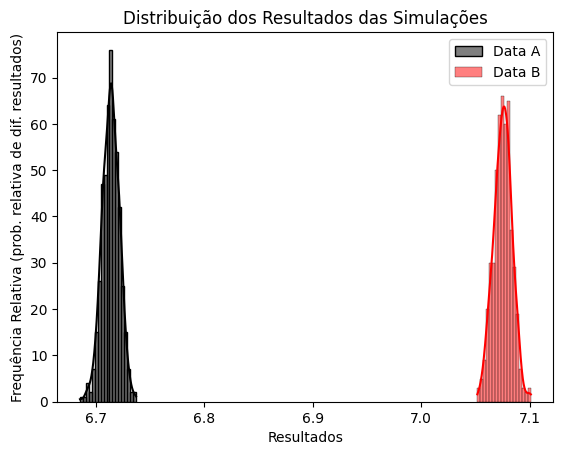

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_simulation_results(results):
    sns.histplot(results['A'], color="black", label='Data A', kde=True)
    sns.histplot(results['B'], color="red", label='Data B', kde=True)
    plt.xlabel('Resultados')
    plt.ylabel('Frequência Relativa (prob. relativa de dif. resultados)')
    plt.title('Distribuição dos Resultados das Simulações')
    plt.legend()
    plt.show()

plot_simulation_results(simulation_results)

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

## Entendendo correlação das variáveis

## Provando a correlação entre tempo médio de sessões e tx de conversão, sendo ela positiva, com base na visualização do gráfico

In [78]:
fig = px.scatter(
    df,
    x="Tempo Médio de Sessão (minutos)",
    y="Taxa de Conversão (%)",
    trendline="ols",
    title="Relação entre Tempo de Sessão e Taxa de Conversão",
    labels={"Tempo Médio de Sessão (minutos)": "Tempo Médio de Sessão (min)",
            "Taxa de Conversão (%)": "Taxa de Conversão (%)"}
)
fig.update_layout(
    xaxis_title="Tempo Médio de Sessão (min)",
    yaxis_title="Taxa de Conversão (%)",
    height=500,
    width=800
)
fig.show()

## Agora esperemos que haja uma correlação negativa, entre a taxa de rejeição e conversão, já que são variáveis opostas

In [77]:
fig = px.scatter(
    df,
    x="Taxa de Rejeição (%)",
    y="Taxa de Conversão (%)",
    trendline="ols",
    title="Relação entre Taxa de Rejeição e Taxa de Conversão",
    labels={"Taxa de Rejeição (%)": "Taxa de Rejeição (%)",
            "Taxa de Conversão (%)": "Taxa de Conversão (%)"}
)
fig.update_layout(
    xaxis_title="Taxa de Rejeição (%)",
    yaxis_title="Taxa de Conversão (%)",
    height=500,
    width=800
)
fig.show()

## Visualizando também o efeito similar so número se sessões por taxa de conversão, tendo em vista sua aplicação

In [79]:
fig = px.scatter(
    df,
    x="Sessões",
    y="Taxa de Conversão (%)",
    trendline="ols",
    title="Relação entre Taxa de Rejeição e Taxa de Conversão",
    labels={"Sessões": "Sessões",
            "Taxa de Conversão (%)": "Taxa de Conversão (%)"}
)
fig.update_layout(
    xaxis_title="Sessões",
    yaxis_title="Taxa de Conversão (%)",
    height=500,
    width=800
)
fig.show()

## Comprovando as correlações citadas acima

In [80]:
corr_df = df.filter(['Taxa de Rejeição (%)', 'Taxa de Conversão (%)', 'Sessões'])
corr_df.corr()

,Taxa de Rejeição (%),Taxa de Conversão (%),Sessões
Taxa de Rejeição (%),1.000000,-0.974824,-0.968901
Taxa de Conversão (%),-0.974824,1.000000,0.983243
Sessões,-0.968901,0.983243,1.000000


In [81]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [84]:
df.columns

Index(['Data', 'Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)',
       'Páginas por Sessão', 'Principais Origens do Tráfego', 'Dispositivos',
       'Eventos', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)'],
      dtype='object')

## Uso de Machine Learning para aplicação na Análise de Sensibilidade

In [85]:
X = df.drop(["Principais Origens do Tráfego", "Taxa de Conversão (%)", 'Data', 'Dispositivos' ], axis=1)
y = df["Taxa de Conversão (%)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.18
MAE: 0.13


In [87]:
n_simulations = 1000
predicted_conversions = []

for _ in range(n_simulations):
    # O método de bootstrapping nesta linha de código cria uma nova amostra dos dados originais,
    # permitindo repetições, para estimar a variabilidade das estatísticas ou do modelo
    bootstrap_sample = resample(X, n_samples=len(X), replace=True, random_state=None)

    # Fazendo previsões com o modelo de floresta aleatória
    predicted_conversion = model.predict(bootstrap_sample)

    # Armazene os resultados
    predicted_conversions.extend(predicted_conversion)

# Converta os resultados em um DataFrame para análise
predicted_conversions_df = pd.DataFrame(predicted_conversions, columns=['Taxa de Conversão Prevista (%)'])

# Calculando estatísticas descritivas
statistics_df = predicted_conversions_df.describe()

print(statistics_df)

       Taxa de Conversão Prevista (%)
count                    60000.000000
mean                         4.502267
std                          1.438360
min                          2.171548
25%                          3.294584
50%                          4.480633
75%                          5.685811
max                          6.959636


In [90]:
fig = px.histogram(predicted_conversions_df, x='Taxa de Conversão Prevista (%)',
                   title='Distribuição da Taxa de Conversão Prevista',
                   labels={'Taxa de Conversão Prevista (%)': 'Taxa de Conversão (%)'},
                   nbins=30,
                   opacity=0.85,
                   color_discrete_sequence=['indianred'])

fig.update_layout(
    xaxis_title='Taxa de Conversão (%)',
    yaxis_title='Contagem',
    bargap=0.2,
    width=800,
    height=500
)
fig.show()

## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.